In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE


In [13]:
df = pd.read_excel('hr_comma_sep.xlsx')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [17]:
df["left"].unique()

array([1, 0], dtype=int64)

In [18]:
df["promotion_last_5years"].unique()

array([0, 1], dtype=int64)

In [19]:
df["number_project"].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [20]:
df.satisfaction_level.unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [21]:
df.last_evaluation.unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [22]:
df.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [23]:
df.Work_accident.unique()

array([0, 1], dtype=int64)

In [24]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [25]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [28]:
df.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

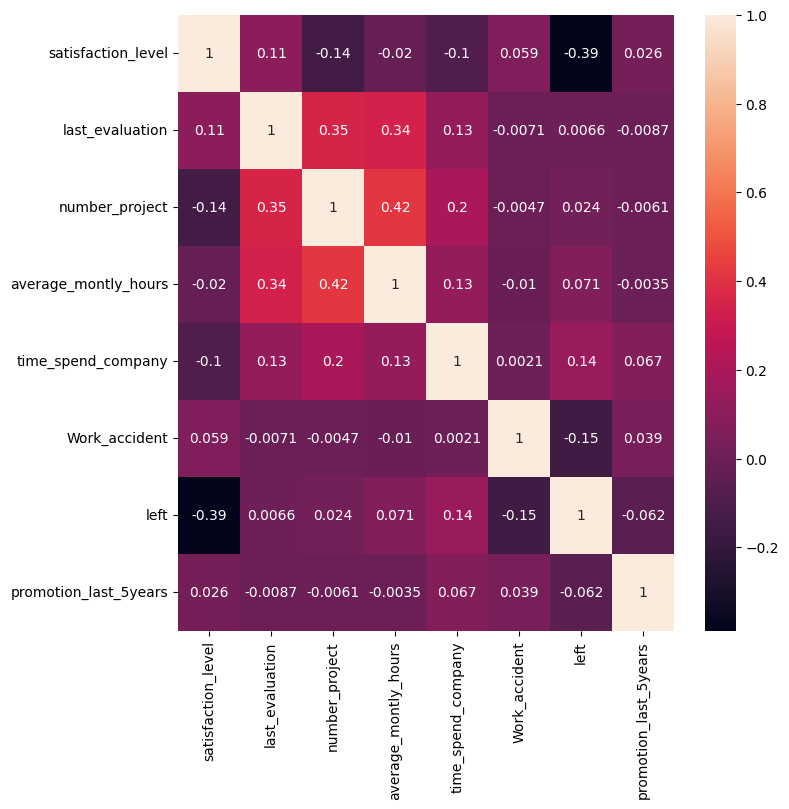

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [30]:
df1 = df.groupby(["sales"])["left"].value_counts().reset_index(name="count")
df1=pd.DataFrame(df1)

In [31]:
df["sales"].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [35]:
dft=df["sales"].value_counts().reset_index(name="Total")
dft=dft.rename(columns={"index":"sales"})
dft

,sales,Total
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [37]:
dfmer=df1.merge(dft,how="left")
dfmer

,sales,left,count,Total
0,IT,0,954,1227
1,IT,1,273,1227
2,RandD,0,666,787
3,RandD,1,121,787
4,accounting,0,563,767
5,accounting,1,204,767
6,hr,0,524,739
7,hr,1,215,739
8,management,0,539,630
9,management,1,91,630


In [39]:
dfmer["normal"] =dfmer["count"].div(dfmer["Total"].values) * 100
dfmer

,sales,left,count,Total,normal
0,IT,0,954,1227,77.750611
1,IT,1,273,1227,22.249389
2,RandD,0,666,787,84.625159
3,RandD,1,121,787,15.374841
4,accounting,0,563,767,73.402868
5,accounting,1,204,767,26.597132
6,hr,0,524,739,70.906631
7,hr,1,215,739,29.093369
8,management,0,539,630,85.555556
9,management,1,91,630,14.444444


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

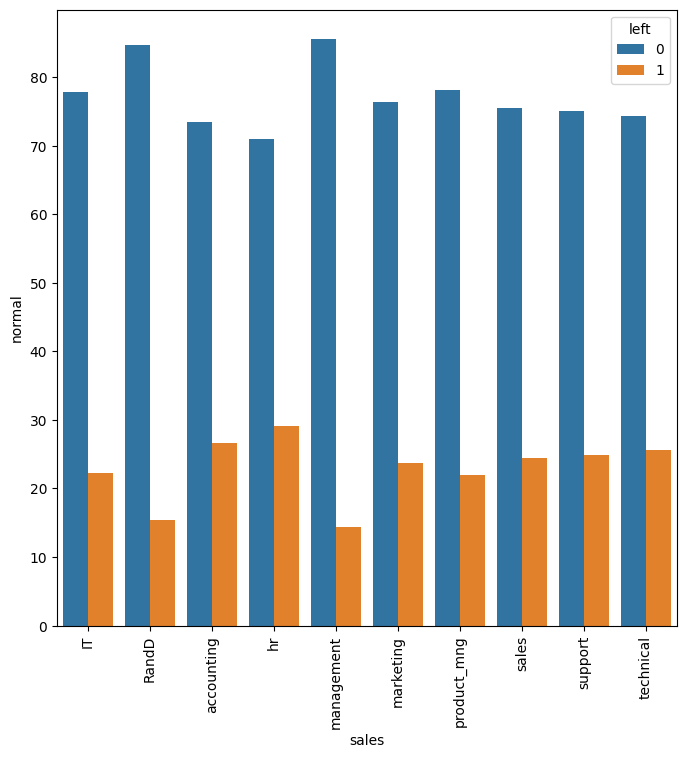

In [40]:
plt.figure(figsize=(8,8))
sns.barplot(x="sales", y='normal', hue="left",data=dfmer)
plt.xticks(rotation=90)

Based on the data people are leaving the hr department in the highest amount based on the normalized data.

In [41]:
df1.head()

,sales,left,count
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

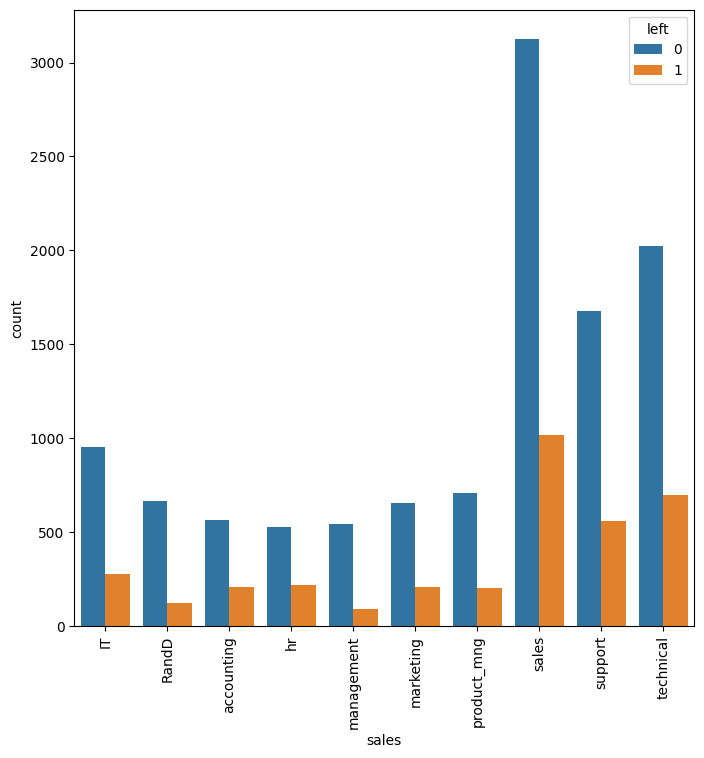

In [42]:
plt.figure(figsize=(8,8))
sns.barplot(x="sales",y='count',hue="left",data=df1)
plt.xticks(rotation=90)

According to just number of people leaving the sales department is seeing the most departures

In [43]:
df2=df.groupby(["salary"])["left"].value_counts().reset_index(name="count")
df2=pd.DataFrame(df2)
df2.head()

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129


([0, 1, 2], [Text(0, 0, 'high'), Text(1, 0, 'low'), Text(2, 0, 'medium')])

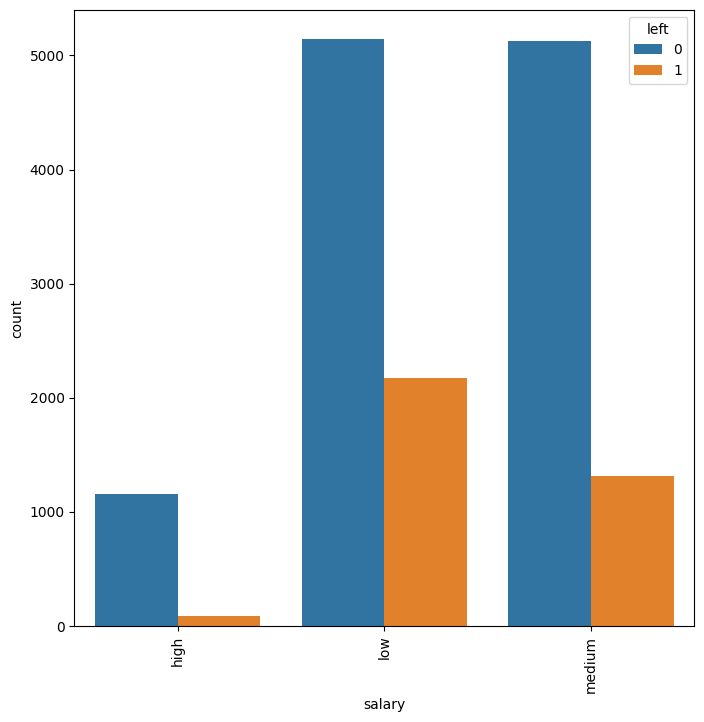

In [45]:
plt.figure(figsize=(8,8))
sns.barplot(x="salary",y='count',hue="left",data=df2)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '10')])

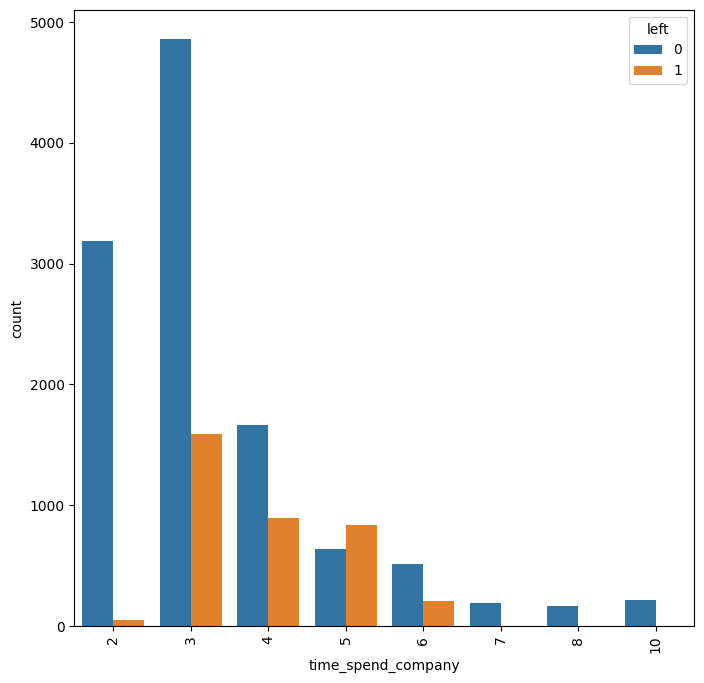

In [46]:
df3=df.groupby(["time_spend_company"])["left"].value_counts().reset_index(name="count")
df3=pd.DataFrame(df3)

plt.figure(figsize=(8,8))
sns.barplot(x="time_spend_company",y='count',hue="left",data=df3)
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

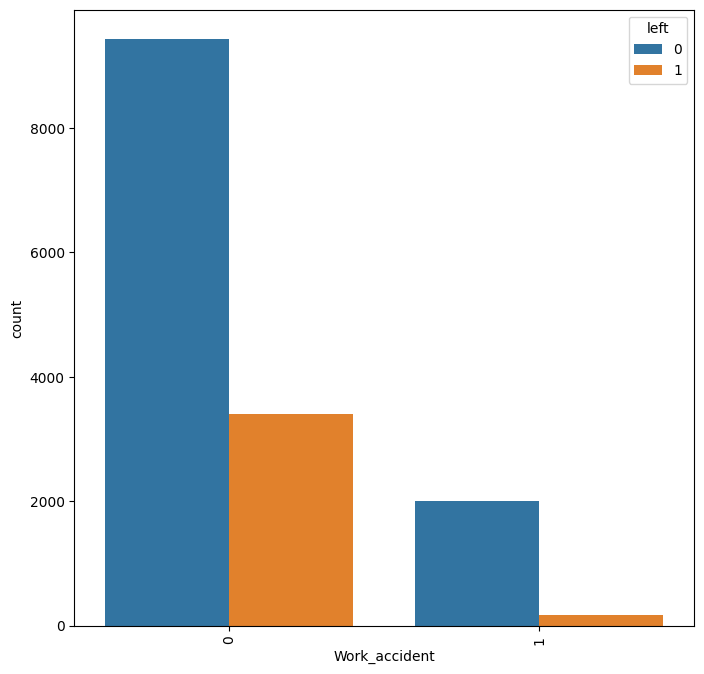

In [49]:
plt.figure(figsize=(8,8))
sns.countplot(x="Work_accident",hue="left",data=df)
plt.xticks(rotation=90)

In [50]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <BarContainer object of 10 artists>)

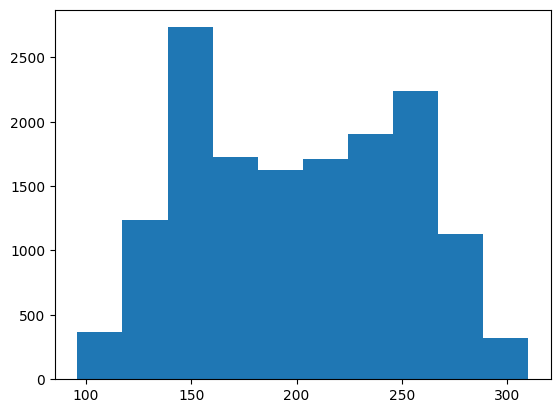

In [53]:
plt.hist(df["average_montly_hours"])

<Axes: xlabel='average_montly_hours', ylabel='Count'>

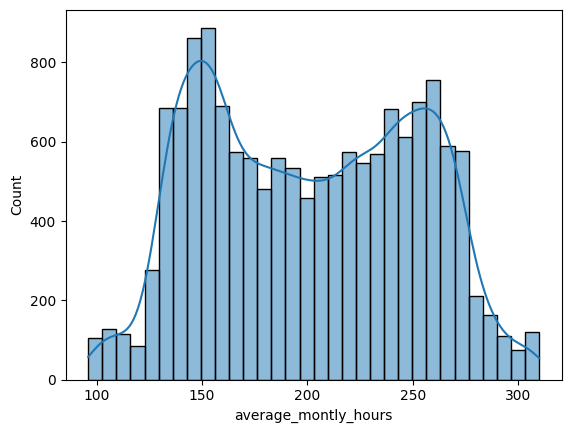

In [54]:
sns.histplot(data=df, x="average_montly_hours", kde=True,bins=32)

<Axes: xlabel='satisfaction_level', ylabel='Count'>

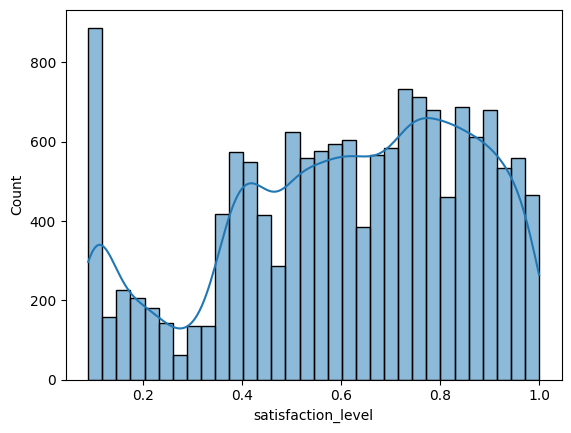

In [55]:
sns.histplot(data=df, x='satisfaction_level', kde=True,bins=32)

<Axes: xlabel='last_evaluation', ylabel='Count'>

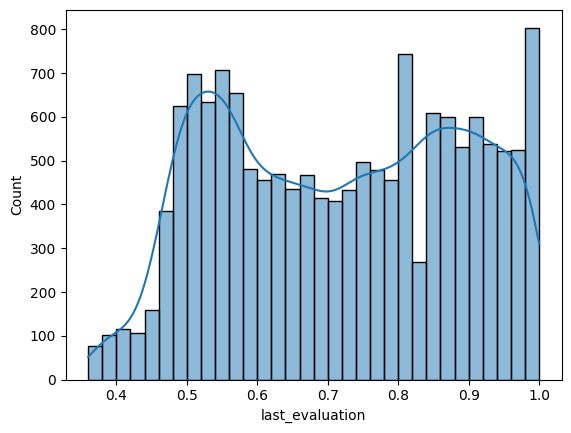

In [56]:
sns.histplot(data=df, x="last_evaluation", kde=True,bins=32)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7')])

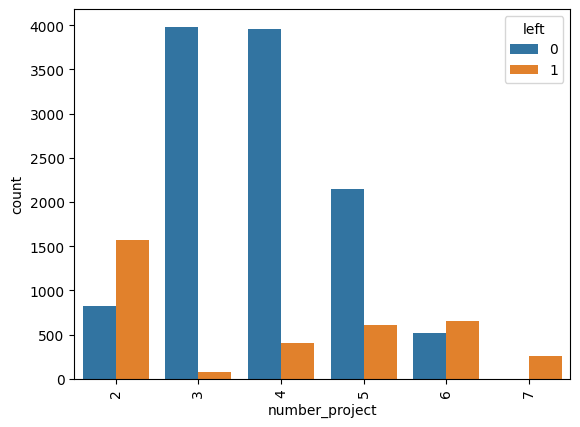

In [58]:
sns.countplot(x="number_project",hue="left",data=df)
plt.xticks(rotation=90)

Based on this data people who have worked on 3 - 5 projects are most likely to leave the organization.

In [59]:
dfclus=df[["satisfaction_level","last_evaluation", "left"]]
dfclus

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [63]:
km=dfclus.iloc[:,:].values
kmeans=KMeans(n_clusters=3, random_state=0)
label=kmeans.fit_predict(dfclus)
labelarr=kmeans.fit_predict(km)
label

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
dfclus[label==0].describe()

,satisfaction_level,last_evaluation,left
count,4596.000000,4596.000000,4596.0
mean,0.453814,0.679569,0.0
std,0.152887,0.165613,0.0
min,0.120000,0.360000,0.0
25%,0.340000,0.550000,0.0
50%,0.510000,0.670000,0.0
75%,0.570000,0.810000,0.0
max,0.690000,1.000000,0.0


In [65]:
dfclus[label==1].describe()

,satisfaction_level,last_evaluation,left
count,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,1.0
std,0.263933,0.197673,0.0
min,0.090000,0.450000,1.0
25%,0.130000,0.520000,1.0
50%,0.410000,0.790000,1.0
75%,0.730000,0.900000,1.0
max,0.920000,1.000000,1.0


In [66]:
dfclus[label==2].describe()

,satisfaction_level,last_evaluation,left
count,6832.000000,6832.000000,6832.0
mean,0.810095,0.739627,0.0
std,0.109845,0.154931,0.0
min,0.590000,0.360000,0.0
25%,0.720000,0.610000,0.0
50%,0.810000,0.740000,0.0
75%,0.910000,0.870000,0.0
max,1.000000,1.000000,0.0


In [68]:
km[label==0,1]

array([0.74, 0.69, 0.6 , ..., 0.94, 0.65, 0.73])

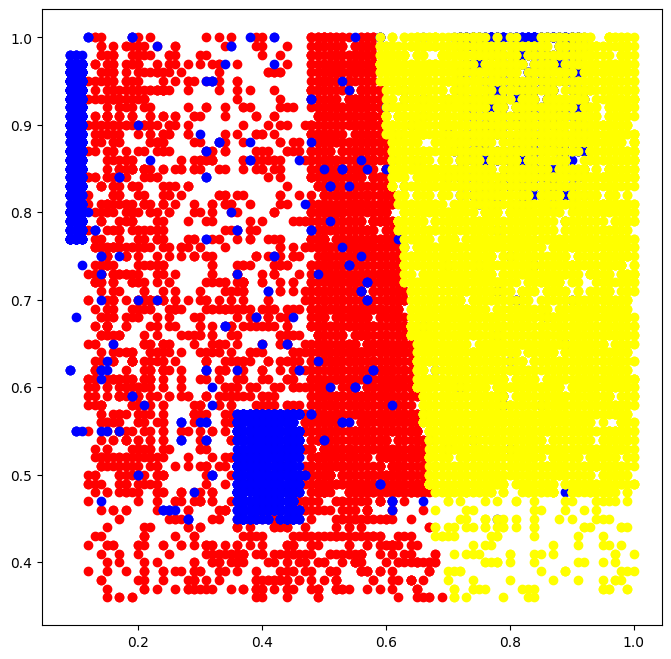

In [69]:
plt.figure(figsize=(8,8))
plt.scatter(km[label==0,0],km[label==0,1],color="red")
plt.scatter(km[label==1,0],km[label==1,1],color="blue")
plt.scatter(km[label==2,0],km[label==2,1],color="yellow")

The yellow group is people with the highest satisfaction levels and highest in the last evaluation. Blue is the group with medium satisfaction levels and scored in the average range of the last evaluation. Red is the lowest satisfaction group and they scored fair on the last evaluation.

In [73]:
df_num=df.select_dtypes(include=['int64','float64'])
df_cat=df.select_dtypes(include=['object'])
df_con=pd.get_dummies(data=df_cat, dtype=int)
df_con.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [74]:
dfn=pd.concat([df_num,df_con], axis=1, join="inner")
dfn.shape

(14999, 21)

In [75]:
dfn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [79]:
x=dfn.drop("left",axis=1)
y=dfn["left"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((11999, 20), (3000, 20), (11999,), (3000,))

In [80]:
ytrain.value_counts()

left
0    9137
1    2862
Name: count, dtype: int64

It is worth mentioning that the number of people that left compared to the number of people thath have stayed is very low

In [83]:
sm = SMOTE(random_state=2)
xtrainres, ytrainres = sm.fit_resample(xtrain, ytrain)
ytrainres.value_counts()

left
0    9137
1    9137
Name: count, dtype: int64

In [86]:
log = LogisticRegression(solver='lbfgs', max_iter=10000)
print(cross_val_score(log, xtrainres, ytrainres, cv=5).mean())

0.8062290000202166


In [92]:
log.fit(xtrainres, ytrainres)
ypred=log.predict(xtest)
confusion_matrix(ytest,ypred)

array([[1831,  460],
       [ 228,  481]], dtype=int64)

In [93]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2291
           1       0.51      0.68      0.58       709

    accuracy                           0.77      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.80      0.77      0.78      3000



In [94]:
roc_auc_score(ytest,ypred)

0.7388173135941893

[0.         0.20078568 1.        ]
[0.         0.67842031 1.        ]
[inf  1.  0.]


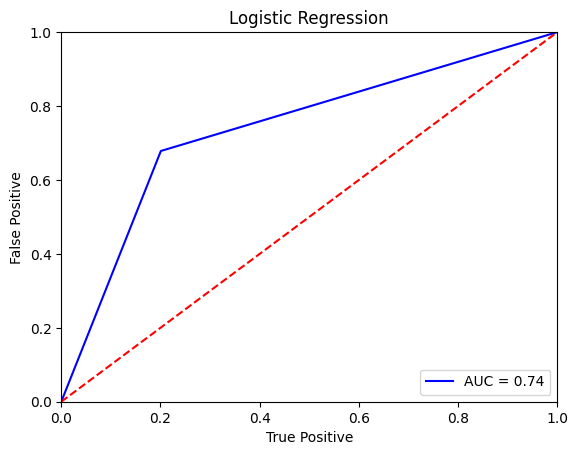

In [101]:
fpr, tpr, threshold = roc_curve(ytest,ypred)
print(fpr)
print(tpr)
print(threshold)
roc_auc = auc(fpr,tpr)

plt.title('Logistic Regression')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive')
plt.ylabel('False Positive')
plt.show()

In [103]:
rdm=RandomForestClassifier(max_depth=5)
print(cross_val_score(rdm, xtrainres,ytrainres, cv=5).mean())

0.9487250297071516


In [104]:
rdm.fit(xtrainres,ytrainres)
ypred1=rdm.predict(xtest)

In [105]:
confusion_matrix(ytest,ypred1)

array([[2218,   73],
       [  59,  650]], dtype=int64)

In [106]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2291
           1       0.90      0.92      0.91       709

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [107]:
roc_auc_score(ytest,ypred1)

0.9424601940874914

[0.         0.03186381 1.        ]
[0.        0.9167842 1.       ]
[inf  1.  0.]


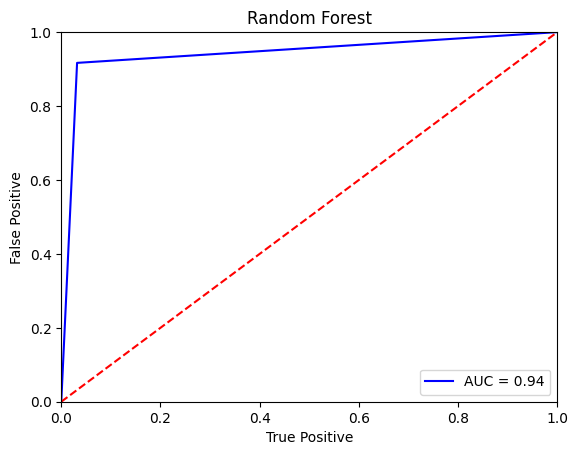

In [108]:
fpr, tpr, threshold = roc_curve(ytest,ypred1)
print(fpr)
print(tpr)
print(threshold)
roc_auc = auc(fpr,tpr)

plt.title('Random Forest')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive')
plt.ylabel('False Positive')
plt.show()

In [111]:
gb=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1,random_state=0)
print(cross_val_score(gb,xtrainres,ytrainres,cv=5).mean())

0.9477401374877671


In [112]:
gb.fit(xtrainres,ytrainres)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [113]:
ypred2=gb.predict(xtest)

In [114]:
confusion_matrix(ytest,ypred2)

array([[2172,  119],
       [  46,  663]], dtype=int64)

In [115]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2291
           1       0.85      0.94      0.89       709

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.93      3000
weighted avg       0.95      0.94      0.95      3000



In [116]:
roc_auc_score(ytest,ypred2)

0.9415887519631305

[0.         0.05194238 1.        ]
[0.         0.93511989 1.        ]
[inf  1.  0.]


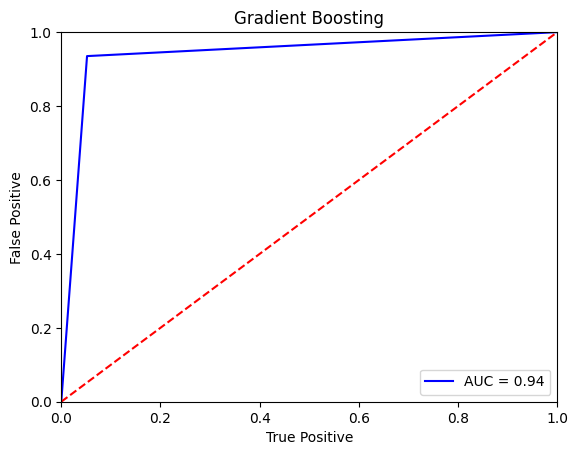

In [117]:
fpr, tpr, threshold = roc_curve(ytest,ypred2)
print(fpr)
print(tpr)
print(threshold)
roc_auc = auc(fpr,tpr)

plt.title('Gradient Boosting')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive')
plt.ylabel('False Positive')
plt.show()

Gvien the different confusion matrices the Recall is the best metric to use because false negatives need to be as low as possible since this will have the highest outcome on potentially misusing a strategy to retain employees.

In [118]:
col = xtrain.columns
col

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [124]:
feat_label = np.array(col)
importance = rdm.feature_importances_
feat_index_by_importance = importance.argsort()
for i in feat_index_by_importance:
    print(f"{feat_label[i]} - %{importance[i] * 100: .2f}")

sales_marketing - % 0.01
sales_accounting - % 0.01
sales_IT - % 0.02
sales_hr - % 0.02
sales_technical - % 0.03
sales_support - % 0.03
sales_product_mng - % 0.06
sales_sales - % 0.07
sales_management - % 0.18
promotion_last_5years - % 0.18
sales_RandD - % 0.20
salary_low - % 0.46
salary_medium - % 0.53
salary_high - % 1.59
Work_accident - % 4.09
last_evaluation - % 10.33
average_montly_hours - % 13.03
number_project - % 17.49
time_spend_company - % 24.73
satisfaction_level - % 26.93


This list shows the factors that influence employee turnover and the percent it appears to affect the employees. It shows that satisfaction level and time spent at the company are the two highest factors in employee turnover. Improving employee satisfaction would help retain more people and in turn with more time spent at the company people would feel it is beneficial to stay.

In [125]:
predict_prob = rdm.predict_proba(xtest)
predict_prob[:,1]

array([0.05678004, 0.10834676, 0.09167959, ..., 0.72841643, 0.07094542,
       0.14259689])

In [128]:
zone = []
prob = []
for i in predict_prob[:,1]:
    prob.append(i)
    if(i <= .2):
        zone.append("Safe Zone")
    elif(.2 < i <= .6):
        zone.append("Low Risk Zone")
    elif(.6 < i <= .9):
        zone.append("Medium Risk Zone")
    else:
        zone.append("High Risk Zone")
        
categories = ["Safe Zone", "Low Risk Zone", "Medium Risk Zone", "High Risk Zone"]
color = ["Green", "Yellow", "Orange", "Red"]

colordict = dict(zip(categories,color))

clr = pd.DataFrame({"zone":zone, "probability":prob})

clr["zone"].unique()

array(['Safe Zone', 'High Risk Zone', 'Medium Risk Zone', 'Low Risk Zone'],
      dtype=object)

In [130]:
clr["Color"] = clr["zone"].apply(lambda x: colordict[x])
clr

,zone,probability,Color
0,Safe Zone,0.056780,Green
1,Safe Zone,0.108347,Green
2,Safe Zone,0.091680,Green
3,Safe Zone,0.104328,Green
4,Safe Zone,0.088618,Green
...,...,...,...
2995,High Risk Zone,0.938858,Red
2996,Safe Zone,0.080724,Green
2997,Medium Risk Zone,0.728416,Orange
2998,Safe Zone,0.070945,Green


C:\Users\mkolb\AppData\Local\Temp\ipykernel_13324\24997703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=zone,palette=c)


<Axes: ylabel='count'>

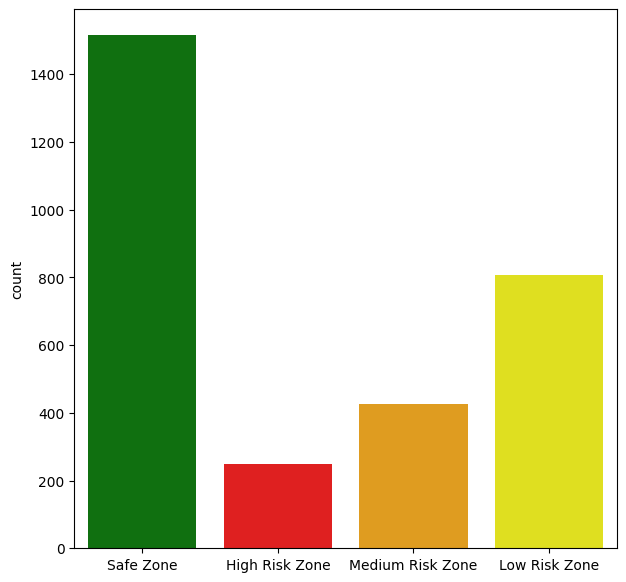

In [133]:
color=clr["Color"].tolist()
c=["Green", "Red", "Orange", "Yellow"]
plt.figure(figsize=(7,7))
sns.countplot(x=zone,palette=c)
